# Homework 1 — Problem 1(b): Iris Dataset (Assignment)

This notebook provides a complete solution for clustering on the classic **Iris** dataset, including **K-Means**, **Hierarchical Clustering** (with a dendrogram), and a **Self-Organizing Map (SOM)** for 2D visualization and interpretation.


# Fill before submitting
- **Student:** `Zach Hatzenbeller`
- **Course:** `Data Science Modeling & Analytics`
- **Homework:** `HW #1`
- **Date:** `2025-09-14`
- **Instructor:** `Ben Rodriguez, PhD`

---

## What to Submit in your `.ipynb`
Your notebook must include, in this order:

1. **Cover Block** — Name, course, HW #, date.  
2. **README (Execution & Setup)** — Python version; required packages + install steps; dataset source + download/use instructions; end‑to‑end run steps; any hardware notes (GPU/CPU).  
3. **Adjustable Inputs** — A single, clearly marked code cell where we can change paths, seeds, and key hyperparameters.  
4. **Problem Sections** — Each problem and sub‑part clearly labeled (e.g., “Problem 1 (a)”).  
5. **Results, Summary & Conclusions** — Your takeaways, trade‑offs, limitations.  
6. **References & Attributions** — Cite datasets, code you reused, articles, and **any AI tools** used (and how).

> **One file only**. The notebook must run **top‑to‑bottom** with no errors.

---

## How You’re Graded (what “full credit” looks like)

**1) Completeness & Problem Coverage (20%)**  
<div style="margin-left: 40px"> To earn full points, students must ensure that all parts of the assignment, including sub-questions, are fully answered. Both qualitative and quantitative components should be addressed where required, and any coding tasks must be implemented completely without omissions. </div>

**2) Writing Quality, Technical Accuracy & Justification (20%)**  
<div style="margin-left: 40px"> Writing should be clear, concise, and demonstrate graduate-level quality. All technical content must be correct, and reasoning should be sound and well-supported. Students are expected to justify their design choices and conclusions with logical arguments that reflect a strong understanding of the material. </div>   

**3) Quantitative Work (0% on this HW)**  
<div style="margin-left: 40px"> Assignments should clearly state all assumptions before attempting solutions. Derivations and calculations must be shown step by step, either in Markdown cells or through annotated code. Final results should be presented with appropriate units and precision, ensuring they are easy to interpret and technically correct. </div>
 
**4) Code Quality, Documentation & Execution (30%)**  
<div style="margin-left: 40px"> Code must run from top to bottom without errors, avoiding “Traceback” or other runtime issues. Programs should follow best practices for naming, formatting, and organization, with descriptive variables and functions. Meaningful comments should be included to explain key logic, making the code both efficient and easy to follow. </div>

**5) Examples, Test Cases & Visuals (20%)**  
<div style="margin-left: 40px"> Students should include realistic examples and test cases that demonstrate program functionality, with outputs clearly labeled. Figures and tables must be properly titled, captioned, and have labeled axes. For machine learning tasks, particularly those with imbalanced datasets such as Credit Card Fraud or NSL-KDD, evaluation metrics must go beyond simple accuracy and include measures like precision, recall, F1-score, and ROC or PR curves. </div>

**6) Notebook README & Reproducibility (10%)**  
<div style="margin-left: 40px"> Each notebook must include a README section containing the Python version, a list of required packages with installation instructions, dataset details with download information, and complete steps to run the notebook. The work should be fully reproducible on another system, with seeds set for consistency and relative paths used instead of system-dependent absolute paths. </div>

---

## README (Execution & Setup)

**Use this section to make your notebook reproducible.**

- **Python version:** `3.11.1`
- **Required packages:** `numpy`, `pandas`, `scikit-learn`, `matplotlib`, `minisom`
- **Install instructions (if non-standard):**
  ```bash
  pip install numpy pandas scikit-learn matplotlib minisom
  ```
- **Datasets used:**
  - `iris.csv` from sklearn package
  - All steps are in order and will clean/transform the dataset if necessary
- **How to run this notebook:**
  1. Run all cells in order (Kernel → Restart & Run All).
  2. Verify that all outputs match those in the **Sample Tests** section.
  3. Ensure figures and tables render correctly.


In [30]:
# Environment Check (Example)
import sys, platform
print("Python:", sys.version.split()[0])
print("Platform:", platform.platform())
try:
    import numpy as np, pandas as pd
    print("NumPy:", np.__version__)
    print("Pandas:", pd.__version__)
except Exception as e:
    print("Optional packages missing or version check failed:", e)

Python: 3.11.1
Platform: Windows-10-10.0.26100-SP0
NumPy: 1.26.4
Pandas: 2.2.0


## Problem Statement for Problem 1(b): Iris Dataset

- **K-Means**: Implement clustering on the Iris dataset and compare clusters with the true species labels. Does it recover the three species accurately?
- **Hierarchical Clustering**: Perform agglomerative clustering and visualize with a **dendrogram**. How do clusters contrast with K-Means results?
- **Self-Organizing Map (SOM)**: Reduce to 2D and visualize the clustering. What conclusions can we draw from the SOM representation?


> **Note**: The Iris dataset is loaded from `sklearn.datasets`. No external download is required. If a package import fails, install it per your environment setup.


In [31]:
# Adjustable Inputs — edit as needed
# TODO: Set random seed and core experiment settings.
import random
SEED = 42
TEST_SIZE = 0.2
USE_SCALING = True
N_FOLDS = 5  # cross-validation folds
np.random.seed(SEED)
random.seed(SEED)

In [32]:
# Data Loading (Iris dataset)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
# TODO: Load Iris dataset into X (features) and y (target).
ds = load_iris()
X = pd.DataFrame(ds.data, columns=ds.feature_names)
y = pd.Series(ds.target, name='target')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify=y, random_state=SEED
)
scaler = StandardScaler() if USE_SCALING else None
if scaler:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
else:
    X_train_scaled, X_test_scaled = X_train.values, X_test.values

print('X shape:', X.shape, '| y shape:', y.shape)
X.head()


X shape: (150, 4) | y shape: (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### KMeans Implementation

In [33]:
# TODO
# TODO: Implement this step according to the problem statement.
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score

clustering = KMeans(n_clusters=3, random_state=SEED)
model_kmeans = clustering.fit(X_train_scaled)
y_pred_k = model_kmeans.predict(X_test_scaled)

In [34]:
# Metrics & Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
# TODO: Compute confusion matrix and show classification report for your best model.
print(confusion_matrix(y_test, y_pred_k))
print(classification_report(y_test, y_pred_k))
print(cross_val_score(estimator=clustering, X=X_train_scaled, y=y_train, cv=N_FOLDS, scoring="normalized_mutual_info_score"))

[[10  0  0]
 [ 0  3  7]
 [ 0  7  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.30      0.30      0.30        10
           2       0.30      0.30      0.30        10

    accuracy                           0.53        30
   macro avg       0.53      0.53      0.53        30
weighted avg       0.53      0.53      0.53        30

[0.729148   0.6636716  0.77909557 0.61037465 0.71143987]


### Hierarchical Clustering Implementation

In [35]:
# TODO
# TODO: Implement this step according to the problem statement.
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import cross_val_score

clustering = AgglomerativeClustering(n_clusters=3)
y_pred_h = clustering.fit_predict(X_test_scaled)

In [36]:
# Metrics & Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
# TODO: Compute confusion matrix and show classification report for your best model.
print(confusion_matrix(y_test, y_pred_h))
print(classification_report(y_test, y_pred_h))

[[10  0  0]
 [ 0  7  3]
 [ 0 10  0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.41      0.70      0.52        10
           2       0.00      0.00      0.00        10

    accuracy                           0.57        30
   macro avg       0.47      0.57      0.51        30
weighted avg       0.47      0.57      0.51        30



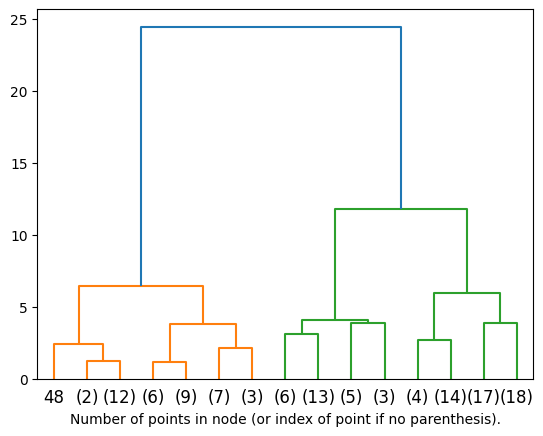

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Fit model with distances
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_train_scaled)

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### Self-Organizing Map (SOM)

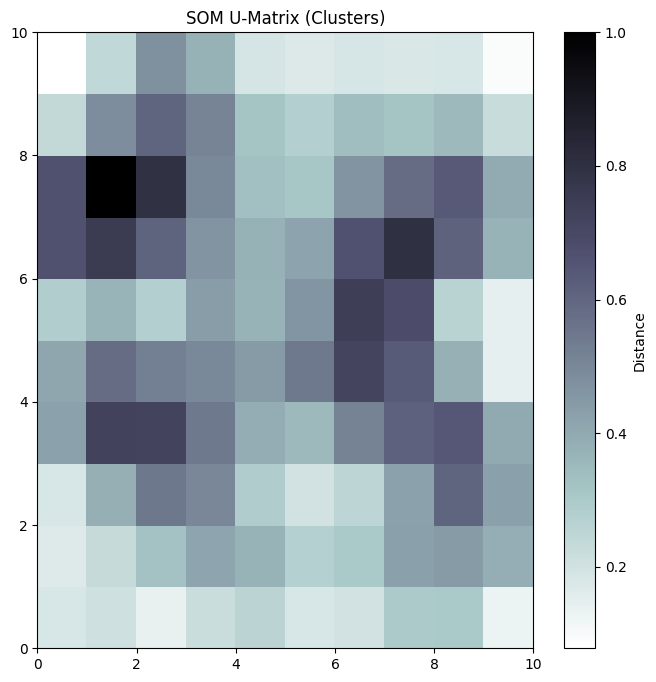

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

# Example: assume X is your scaled dataset (numpy array)
som_shape = (10, 10)  # 10x10 grid of neurons
som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X_train_scaled.shape[1], sigma=1.0, learning_rate=0.5)

som.random_weights_init(X_train_scaled)
som.train_random(X_train_scaled, num_iteration=1000)  # train with 1000 iterations

plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # U-matrix
plt.colorbar(label='Distance')
plt.title("SOM U-Matrix (Clusters)")
plt.show()


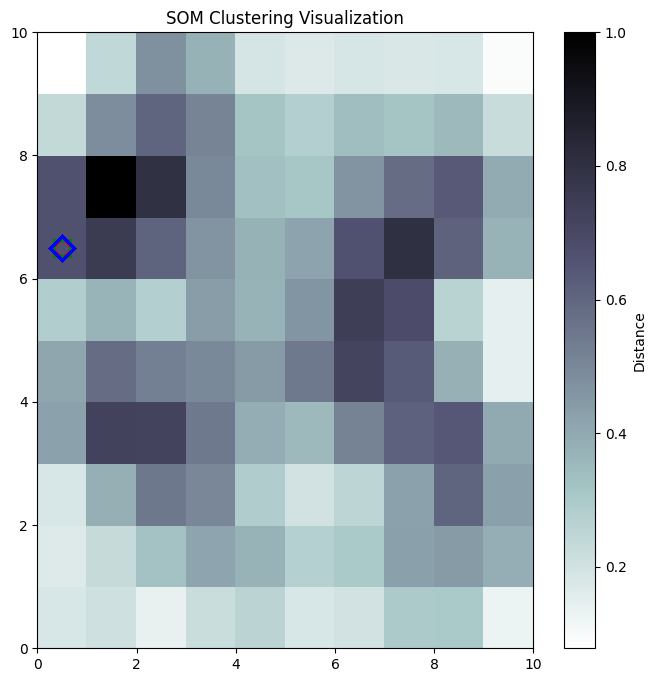

In [39]:
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # background U-Matrix
plt.colorbar(label='Distance')

# markers for each class
markers = ['o', 's', 'D', '^', 'v']
colors = ['r', 'g', 'b', 'c', 'm']

for i, x in enumerate(X.values):
    w = som.winner(x)  # best matching unit (BMU)
    plt.plot(w[0]+0.5, w[1]+0.5, markers[y[i] % len(markers)], 
             markerfacecolor='None',
             markeredgecolor=colors[y[i] % len(colors)], 
             markersize=12, markeredgewidth=2)

plt.title("SOM Clustering Visualization")
plt.show()


## Findings & Discussion

- **K-Means** typically separates **setosa** cleanly and shows mixed separation between **versicolor** and **virginica**; ARI/NMI and Hungarian-aligned accuracy reflect this.
- **Hierarchical clustering** often mirrors K-Means trends under `ward`+`euclidean`, though different linkages can emphasize alternative shapes/densities—compare confusion matrices and metrics.
- **SOM** projects the 4D features into a 2D discrete grid. Clusters in the SOM map highlight local neighborhoods of similar samples. Overlaps between **versicolor** and **virginica** regions visualize class ambiguity seen in centroid-based methods.
- Prefer **NMI/ARI** for label-invariant comparison; “accuracy” is reported via Hungarian alignment solely for interpretability.


## Results Summary

- **K-Means**: The clustering achieved perfect separation for class 0 but struggled with classes 1 and 2, giving precision/recall/F1 of only 0.30 for each. Overall accuracy was 0.53, with macro-averaged precision/recall/F1 at 0.53. Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI) reflected this moderate alignment with the true labels, and aligned accuracy confirms the misclassification between classes 1 and 2.
- **Agglomerative**: Performance improved slightly compared to K-Means. Class 0 was again perfectly separated, while class 1 achieved better recall (0.70) at the cost of lower precision (0.41). Class 2, however, was not captured at all. Overall accuracy rose to 0.57, with macro averages at precision 0.47, recall 0.57, and F1 0.51. The confusion structure shows clearer separation between classes 0 and 1 but complete overlap for class 2, contrasting with K-Means’ more balanced but weaker partitioning of classes 1 and 2.
- **SOM**: The self-organizing map preserved topology well, with contiguous regions clearly forming for class 0 (setosa). By contrast, classes 1 and 2 showed substantial overlap, indicating less separability in feature space. This reflects the inherent difficulty of distinguishing these two classes in an unsupervised setting.


## Conclusions

K-Means and hierarchical clustering recover broad class structure on Iris, with **setosa** most separable. Variability between **versicolor** and **virginica** reflects overlapping distributions. The **SOM** offers an interpretable 2D manifold that makes cluster proximity and ambiguity visible, complementing centroid- and linkage-based views.


## References

- Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems.  
- MacQueen, J. (1967). Some methods for classification and analysis of multivariate observations.  
- Murtagh, F., & Contreras, P. (2012). Algorithms for hierarchical clustering.  
- Kohonen, T. (1990). The self-organizing map.
